In [1]:
%load_ext load_style
%load_style talk.css

# Power Spectral Density

## Introduction

* Methods

> This notebook consists of two methods to carry Spectral Analysis.

> The first one is based on covariance called **pcovar**, which comes from Spectrum: a Spectral Analysis Library in Python. This library that contains tools to estimate Power Spectral Densities based on Fourier transform, Parametric methods or eigenvalues analysis. See more from http://pyspectrum.readthedocs.io/en/latest/index.html.

> Install can be done ==> conda install spectrum

> The second is the welch method that comes from the package of scipy.signal. The library also contains many kinds of method. See more from https://docs.scipy.org/doc/scipy/reference/signal.html.

> In fact, both matplotlib.mlab and Spectrumalso implements the welch method. However, They do not appear flexible as one from scipy.signal. An common error looks like "*ValueError: The len(window) must be the same as the shape of x for the chosen axis*".

* Data

> The 30-years nino3 SSTA series from a previous notebook will be used as an example.

## 1. Load basic libraries

In [2]:
% matplotlib inline

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from matplotlib import mlab

from spectrum import pcovar

from pylab import rcParams
rcParams['figure.figsize'] = 15, 6

## 2. Load nino3 SSTA series

Please keep in mind that the nino3 SSTA series lies between 1970 and 1999 <br>
Recall ex2

### 2.1 Load data

In [3]:
npzfile = np.load('data/ssta.nino3.30y.npz')
npzfile.files

['ssta_series']

In [4]:
ssta_series = npzfile['ssta_series']
ssta_series.shape

(360L, 1L)

### 2.2 Have a quick plot

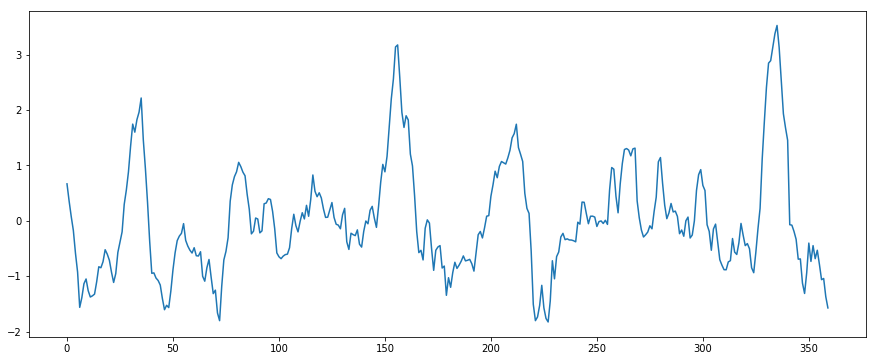

In [5]:
plt.plot(ssta_series)

## 3. Estimates the power spectral density (PSD )

### 3.1 pcovar method

#### 3.1.1 Create PSD

In [6]:
nw   = 48  # order of an autoregressive prediction model for the signal, used in estimating the PSD. 
nfft = 256 # NFFT (int) – total length of the final data sets (padded with zero if needed

fs  = 1     # default value 
p   = pcovar(ssta_series, nw, nfft, fs)

#### 3.1.2 Visualize using embeded plot

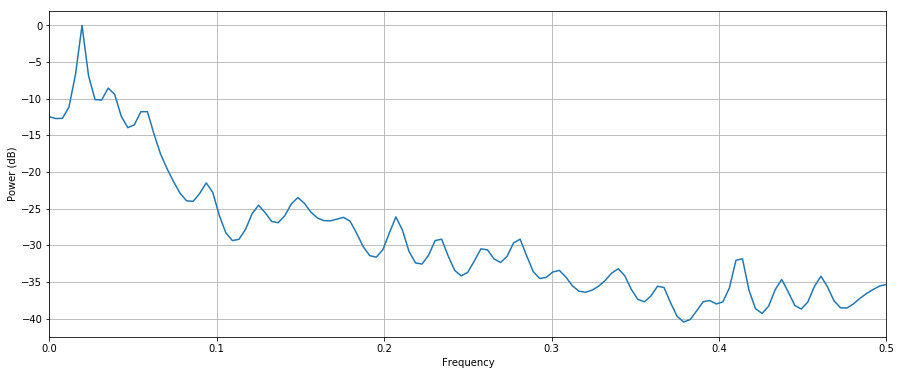

In [7]:
p.plot(norm=True)
#help(p.plot)

#### 3.1.3 Visualize by a customized way

Access the data and properties of a object of pcovar

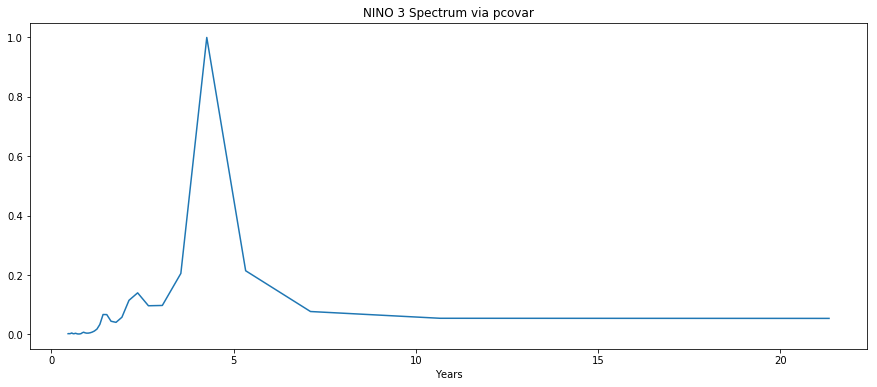

In [8]:
# process frequencies and psd
f0   = np.array(p.frequencies())
pxx0 = p.psd/np.max(p.psd) # noralize the psd values          

plt.plot(1.0/f0[1:47]/12, pxx0[1:47])
plt.title('NINO 3 Spectrum via pcovar');
plt.xlabel('Years') 

### 3.2 welch method

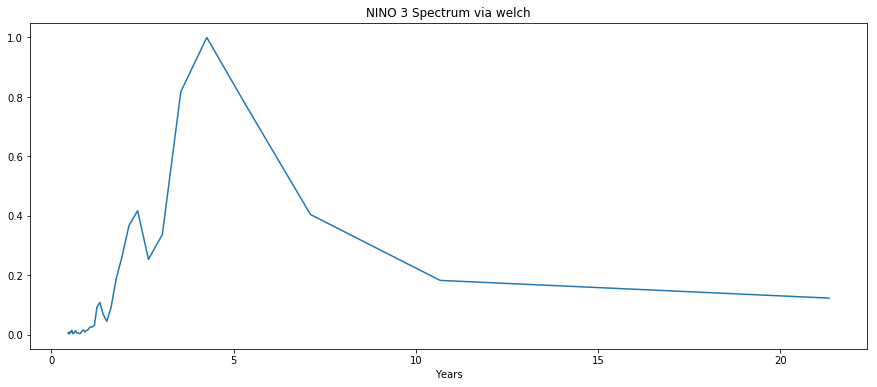

In [9]:
n        = 150 
alpha    = 0.5 
noverlap = 75 
nfft     = 256 #default value 
fs       = 1   #default value 
win      = signal.tukey(n, alpha)
ssta     = ssta_series.reshape(360) # convert vector

f1, pxx1  = signal.welch(ssta, nfft=nfft, fs=fs, window=win, noverlap=noverlap)

# process frequencies and psd
pxx1 = pxx1/np.max(pxx1) # noralize the psd values          
plt.plot(1.0/f1[1:47]/12, pxx1[1:47], label='welch')
plt.title('NINO 3 Spectrum via welch');
plt.xlabel('Years') 

## 4. Have a comparison

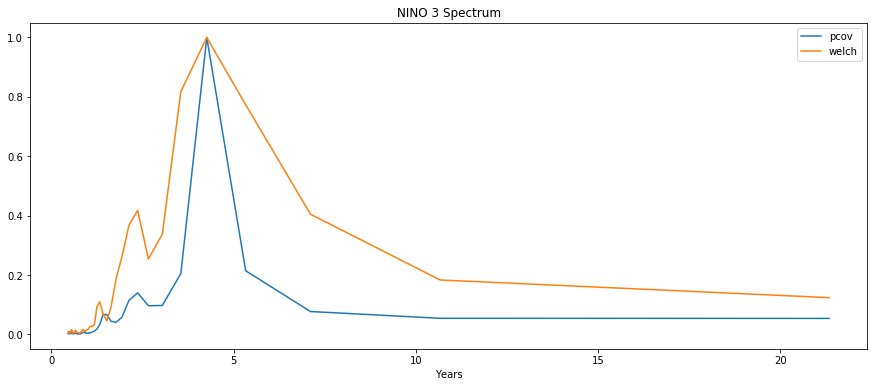

In [10]:
plt.plot(1.0/f0[1:47]/12, pxx0[1:47], label='pcov')
plt.plot(1.0/f1[1:47]/12, pxx1[1:47], label='welch')
plt.title('NINO 3 Spectrum');
plt.legend()
plt.xlabel('Years') 

## References

Bendat & Piersol – Random Data: Analysis and Measurement Procedures, John Wiley & Sons (1986)

Matplotlib: A 2D Graphics Environment by J. D. Hunter In Computing in Science & Engineering, Vol. 9, No. 3. (2007), pp. 90-95

Jones E, Oliphant E, Peterson P, et al. SciPy: Open Source Scientific Tools for Python, 2001-, http://www.scipy.org/ 